In [20]:
import dd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('helvet2')

Edition 6: Phase I

Edition 3: Phase II

Edition 4: Phase III

In [102]:
shotnr = 30554
ped = dd.shotfile('PED', shotnr, experiment='guimas', edition=6)

In [103]:
nedata = ped('neData')

In [104]:
mskz = nedata.data!=0.0
rhos = nedata.area.data[0,mskz]
dens = nedata.data[mskz]

IndexError: too many indices for array

In [ ]:
diagind = ped('DiagIndx')
nedpts = ped('neDPts')
indexesr = nedpts.data[nedpts.data!=0]
ped.close()
print(indexesr)

In [85]:
#This still needs some automation
indi = np.array([0, indexesr[0], indexesr[0]+indexesr[1]]).astype(int)
indf = np.array([indexesr[0]-1, indexesr[0]+indexesr[1]-1, indexesr[0]+indexesr[1]+indexesr[2]-1]).astype(int)
zorder = np.array([3,2,1])
labels = [r'$\mathrm{TS_{edge}}$', 'LIN', 'Ref. LFS']
clrs = ['r','g','b']

#### Convert rho to Major Radius

In [86]:
import kk_abock
eq = kk_abock.kk()
eq.Open(30554, diag='FPP')

True

In [87]:
radius = eq.rhopol_to_Rz(3.0, rhos, 0.0)
rad = radius['R']

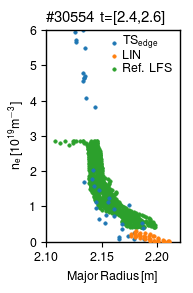

In [88]:
plt.figure(figsize=(2,3), dpi=100)
#for a,b,zord,d,clr in zip(indi, indf, zorder,labels,clrs):
#    plt.scatter(rad[np.int(a):np.int(b)],dens[np.int(a):np.int(b)]*1e-19,s=6,zorder=zord,label=d,c=clr)

plt.scatter(rad[indi[0]:indf[0]], dens[indi[0]:indf[0]]*1e-19, s=6, zorder=2, label=labels[0])
plt.scatter(rad[indi[1]:indf[1]], dens[indi[1]:indf[1]]*1e-19, s=6, zorder=3, label=labels[1])
plt.scatter(rad[indi[2]:indf[2]], dens[indi[2]:indf[2]]*1e-19, s=6, zorder=1, label=labels[2])


plt.xlabel(r'$\mathrm{Major\,Radius\,[m]}$')
plt.ylabel(r'$\mathrm{n_e\,[10^{19}m^{-3}]}$')
plt.ylim(0,6)
plt.xlim(2.10,2.22)
plt.title('\#30554 t=[2.4,2.6]', loc='left')
plt.legend(loc='upper right',borderpad=0.,frameon=False,handletextpad=-0.3,labelspacing=0)
plt.xticks([2.10,2.15,2.20])
plt.tight_layout()
plt.show()

In [76]:
ped.close()